# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студентки гр. 2383 Анищенко Анастасия Ивановна и Бараева Елизавета Николаевна. Вариант №12.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

Формула трапеций:

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

Формула Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

Формула для интегрирования по «правилу 3/8»:

$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное}$

Связь передаточной функции для круговой частоты и циклической:

$H(w) = H(2 \pi f) = \tilde H(f)$

## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math as m

# Циклическая и круговая частоты
F = np.arange(0.0001, 0.5, 0.0001)
W = [2 * m.pi * f for f in F]

## Задание 1

***Квадратурная формула прямоугольников:***

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iwn} + e^{iw\left(n+\frac{1}{2}\right)}$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} + e^{iwn} e^{\left(\frac{iw}{2}\right)}$

$H(w) e^{iwn} (e^{iw} - 1) = e^{iwn} e^{\left(\frac{iw}{2}\right)}$

$H(w) (e^{iw} - 1) = e^{\left(\frac{iw}{2}\right)}$

$H(w) = \frac{e^{(0.5iw)}}{e^{iw} - 1} = \frac{e^{(0.5iw)} \cdot e^{(-0.5iw)}}{(e^{iw} - 1) \cdot e^{(-0.5iw)}} = \frac{1}{e^{(0.5iw)} - e^{(-0.5iw)}} = \frac{1}{cos(0.5w) + i \cdot sin(0.5w) - cos(-0.5w) - i \cdot sin(-0.5w)} = \frac{1}{cos(0.5w) + i \cdot sin(0.5w) - cos(0.5w) + i \cdot sin(0.5w)} = \frac{1}{2 \cdot i \cdot sin(0.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{i \cdot w}{2 \cdot i \cdot sin(0.5w)} = \frac{0.5w}{sin(0.5w)}$

***Квадратурная формула трапеций:***

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iwn} + \frac{1}{2} (e^{iwn} + e^{iw(n+1)})$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} + \frac{1}{2} (e^{iwn} + e^{iwn} e^{iw})$

$H(w) e^{iwn} (e^{iw} - 1) = \frac{1}{2} e^{iwn} (1 + e^{iw})$

$H(w) (e^{iw} - 1) = \frac{1}{2} (1 + e^{iw})$

$H(w)  = \frac{e^{iw} + 1}{2 (e^{iw} - 1)} = \frac{(e^{iw} + 1) e^{-0.5iw}}{2 (e^{iw} - 1) e^{-0.5iw}} = \frac{e^{0.5iw} + e^{-0.5iw}}{2 (e^{0.5iw} - e^{-0.5iw})} = \frac{2 cos(0.5w)}{2 \cdot 2 \cdot i \cdot sin(0.5w)} = \frac{cos(0.5w)}{2 \cdot i \cdot sin(0.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{cos(0.5w) \cdot i \cdot w}{2 \cdot i \cdot sin(0.5w)} = \frac{cos(0.5w) \cdot 0.5 w}{sin(0.5w)}$

***Квадратурная формула Симпсона:***

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iw(n-1)} + \frac{1}{3} (e^{iw(n-1)} + 4e^{iwn} + e^{iw(n+1)})$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} e^{-iw} + \frac{1}{3} (e^{iwn} e^{-iw} + 4e^{iwn} + e^{iwn} e^{iw})$

$H(w) e^{iwn} (e^{iw} - e^{-iw}) = \frac{1}{3} e^{iwn} (e^{-iw} + 4 + e^{iw})$

$H(w) (e^{iw} - e^{-iw}) = \frac{1}{3} (e^{-iw} + 4 + e^{iw})$

$H(w) = \frac{4 + e^{iw} + e^{-iw}}{3 (e^{iw} - e^{-iw})} = \frac{4 + 2cos(w)}{3 \cdot 2 \cdot i \cdot sin(w)} = \frac{2 + cos(w)}{3 \cdot i \cdot sin(w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{(2 + cos(w)) \cdot i \cdot w}{3 \cdot i \cdot sin(w)} = \frac{(2 + cos(w)) \cdot w}{3 \cdot sin(w)}$

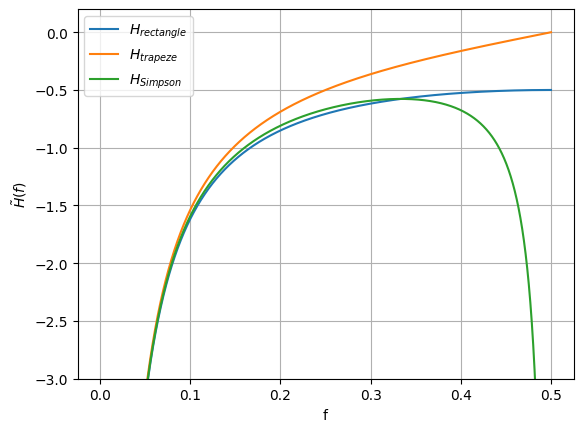

In [17]:
# Значения функций
H_rectangle = [1 / (2 * 1j * np.sin(0.5 * w)) for w in W]
H_trapeze = [np.cos(0.5 * w) / (2 * 1j * np.sin(0.5 * w)) for w in W]
H_Simpson = [(2 + np.cos(w)) / (3 * 1j * np.sin(w)) for w in W]

# График передаточных функций, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона
plt.figure()
plt.plot(F, [h.imag for h in H_rectangle], label='$H_{rectangle}$')
plt.plot(F, [h.imag for h in H_trapeze], label='$H_{trapeze}$')
plt.plot(F, [h.imag for h in H_Simpson], label='$H_{Simpson}$')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-3, 0.2))
plt.legend()
plt.grid()
plt.show()

На графике передаточных функций видно, что все три фильтра усиливают низкие частоты. На средних частотах фильтры начинают ослаблять сигнал: передаточная функця по формуле прямоугольников ослабляет сильнее всего, по формуле трапеций — меньше, а по формуле Симпсона — еще меньше, то есть лучше сохраняет средние частоты. На высоких частотах все фильтры сильно подавляют сигнал, особенно фильтр по формуле Симпсона, на котором наблюдается резкий спад.

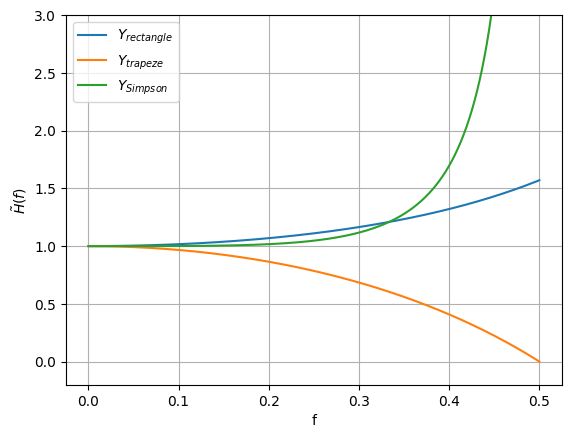

In [18]:
# Значения функций
Y_rectangle = [(0.5 * w) / m.sin(0.5 * w) for w in W]
Y_trapeze = [(m.cos(0.5 * w) * 0.5 * w) / m.sin(0.5 * w) for w in W]
Y_Simpson = [((m.cos(w) + 2) * w) / (3 * m.sin(w)) for w in W]

# График отношений вычисляемых в результате фильтрации значений к истинным
plt.figure()
plt.plot(F, Y_rectangle, label='$Y_{rectangle}$')
plt.plot(F, Y_trapeze, label='$Y_{trapeze}$')
plt.plot(F, Y_Simpson, label='$Y_{Simpson}$')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-0.2, 3))
plt.legend()
plt.grid()
plt.show()

## Задание 2

***Вывод передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:***

$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$

Пусть $x_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+2)} = H(w) e^{iw(n-1)} + \frac{1}{8} (e^{iw(n+2)} + 3 e^{iw(n+1)} + 3 e^{iwn} + e^{iw(n-1)})$

$H(w) e^{iwn} e^{2iw} = H(w) e^{iwn} e^{-iw} + \frac{1}{8} (e^{iwn} e^{2iw} + 3 e^{iwn} e^{iw} + 3 e^{iwn} + e^{iwn} e^{-iw})$

$H(w) e^{iwn} (e^{2iw} - e^{-iw}) = \frac{1}{8} e^{iwn} (e^{2iw} + 3 e^{iw} + 3 + e^{-iw})$

$H(w) (e^{2iw} - e^{-iw}) = \frac{1}{8} (e^{2iw} + 3 e^{iw} + 3 + e^{-iw})$

$H(w) = \frac{e^{2iw} + 3 e^{iw} + 3 + e^{-iw}}{8 (e^{2iw} - e^{-iw})} = \frac{e^{1.5iw} + 3 e^{0.5iw} + 3 e^{-0.5iw} + e^{-1.5iw}}{8 (e^{1.5iw} - e^{-1.5iw})} = \frac{2 cos(1.5w) + 2 cos(0.5w)}{8 \cdot 2 \cdot i sin(1.5w)} = \frac{cos(1.5w) + cos(0.5w)}{8 \cdot i sin(1.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{(cos(1.5w) + cos(0.5w)) \cdot i \cdot w}{8 \cdot i sin(1.5w)} = \frac{(cos(1.5w) + cos(0.5w)) \cdot w}{8 sin(1.5w)}$

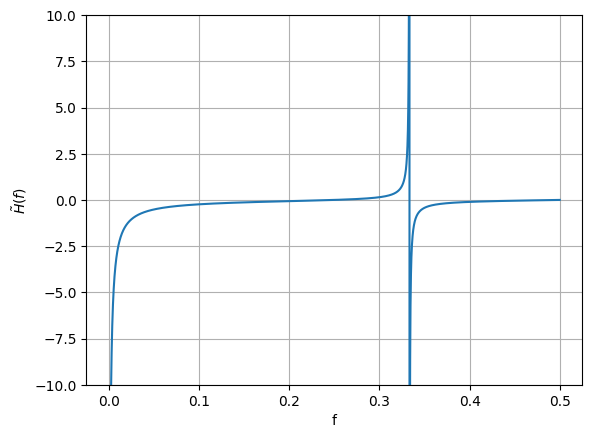

In [19]:
# Значение функции
H_3_8 = [(m.cos(1.5 * w) + m.cos(0.5 * w)) / (8 * 1j * m.sin(1.5 * w)) for w in W]

# График передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»
plt.figure()
plt.plot(F, [h.imag for h in H_3_8])
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

На графике рекурсивного фильтра для интегрирования по "правилу 3/8" наблюдаются асимптоты в нуле и в точке примерно 0.33, в которых сигнал сильно искажается. На небольшом расстоянии от асимптот происходит усиление сигнала, а в остальных же точках сигнал подавляется.

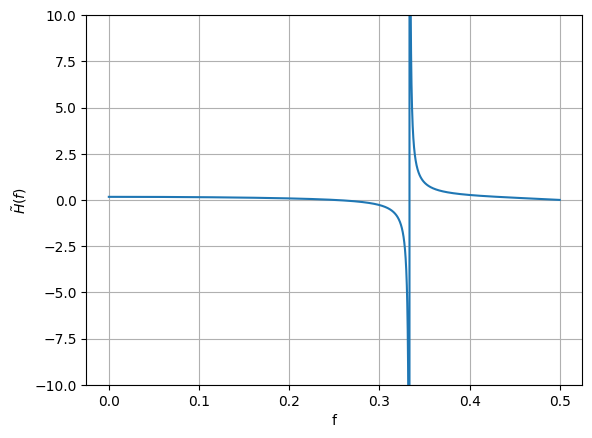

In [20]:
# Значение функции
Y_3_8 = [((m.cos(1.5 * w) + m.cos(0.5 * w)) * w) / (8 * m.sin(1.5 * w)) for w in W]

# График отношения вычисляемого в результате фильтрации значения к истинному
plt.figure()
plt.plot(F, Y_3_8)
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

## Задание 3

Всем фильтрам свойственно сильное искажение сигнала в нуле. На высоких частотах их поведение отличается: у формулы Симпсона наблюдается резкий спад около 0.5, формула прямоугольников немного подавляет сигнал, а формула трапеций полностью его подавляет, рекурсивный фильтр для интегрирования по «правилу 3/8» стремится к нулю. Также у рекурсивного фильтра для интегрирования по «правилу 3/8» есть дополнительная асимптота около 0.33, вызывающая сильные искажения.

## Выводы

В ходе выполнения лабораторной работы были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона, и передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8». По выведенным формулам были построены графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. В конце был проведен сопоставительный анализ частотных характеристик исследуемых рекурсивных фильтров.